Steady state heat equation
======

This notebook will setup and solve the steady state heat equation:

\\[
\nabla(k\nabla)T = h
\\]

where $k$ is the diffusivity, T the temperature field and $h$ the source term.
This model is solved in a rectangular domain with Dirichlet boundary conditions on the top and bottom walls.

**Keywords:** initial conditions, boundary conditions, heat equation


![title](./images/01_temperature.png)


In [1]:
import underworld as uw
import glucifer

In [2]:
# Set some python variables for model parameters
boxHeight = 1.0
boxLength = 2.0
resx = 16
resy = 8

# create mesh and variables
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"), 
                                 elementRes  = (resx, resy), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (boxLength, boxHeight))

In [3]:
# Create mesh variables for the temperature field & initialise. 
temperatureField = mesh.add_variable( nodeDofCount=1 )
temperatureField.data[:] = 0.

In [4]:
# Using the `specialSets` of the mesh we designate the vertices to 
# build the `DirichletCondition` object - Refer to the `Systems` section 
# of the user guide.
botWalls = mesh.specialSets["Bottom_VertexSet"]
topWalls = mesh.specialSets[   "Top_VertexSet"]
bcWalls = botWalls + topWalls
tempBC = uw.conditions.DirichletCondition( variable=temperatureField, indexSetsPerDof=(bcWalls,) )

In [5]:
# set bottom wall temperature bc
temperatureField.data[botWalls] = 1.0
# set top wall temperature bc
temperatureField.data[topWalls] = 0.0


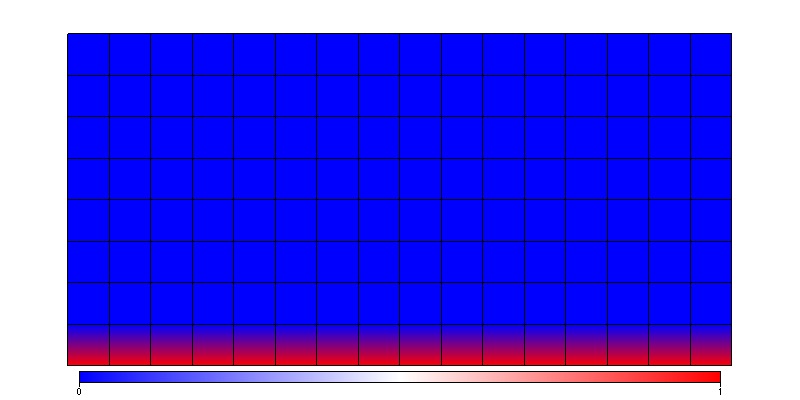

In [6]:
# gLucifer visualisation of temperature field & mesh
fig = glucifer.Figure(figsize=(800,400))
fig.append( glucifer.objects.Mesh(mesh) )
fig.append( glucifer.objects.Surface( mesh, temperatureField, colours="blue white red" ) )
fig.show()

Heat Equation System setup & solve
-----

Temperature field, diffusivity and boundary conditions are passed to the SteadyStateHeat system function.

In [7]:
heatequation = uw.systems.SteadyStateHeat(temperatureField = temperatureField, 
                                            fn_diffusivity = 1.0, 
                                                conditions = tempBC)

# get the default heat equation solver
heatsolver = uw.systems.Solver(heatequation)
# solve
heatsolver.solve()


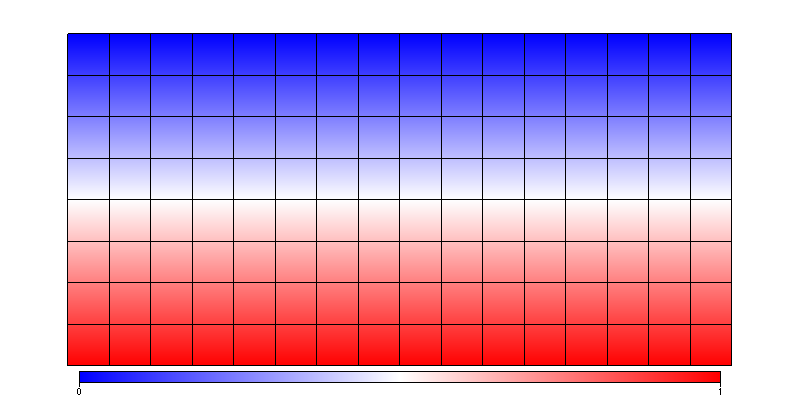

In [8]:
# gLucifer visualisation of temperature field & mesh
fig.show()

In [9]:
# As a test, ensure we reproduce the required average temperature
import numpy as np
tottemp = uw.utils.Integral(temperatureField, mesh)
avtemp = tottemp.evaluate()[0] / (boxHeight*boxLength)
if not np.isclose(avtemp,0.5):
    raise RuntimeError("Incorrect average temperature produced by model. ")